In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings 
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import joblib


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import scipy
import pandas.util.testing as tm
from sklearn.linear_model import LinearRegression
import re
from os import path
from PIL import Image
import plotly
from sklearn.feature_extraction.text import CountVectorizer


from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import scipy
import pandas.util.testing as tm


from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

C:\Users\ptlon\AppData\Local\Temp\ipykernel_13188\2765407707.py:18: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
sns.set_style(style = 'whitegrid')

In [3]:
nba = pd.read_excel(r"C:\Users\ptlon\OneDrive\Desktop\nba_1.xlsx")

In [4]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85470 entries, 0 to 85469
Data columns (total 45 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  85470 non-null  int64  
 1   Season      85470 non-null  int64  
 2   Team        85470 non-null  object 
 3   W           85470 non-null  int64  
 4   L           85470 non-null  int64  
 5   W/L%        85470 non-null  float64
 6   Finish      85470 non-null  int64  
 7   SRS         85470 non-null  float64
 8   Pace        85470 non-null  float64
 9   Rel_Pace    85470 non-null  float64
 10  ORtg_x      85470 non-null  float64
 11  Rel_ORtg    85470 non-null  float64
 12  DRtg_x      85470 non-null  float64
 13  Rel_DRtg    85470 non-null  float64
 14  Playoffs    85470 non-null  int64  
 15  Coaches     85470 non-null  object 
 16  Top WS      85470 non-null  object 
 17  Player      85470 non-null  object 
 18  Age         85470 non-null  int64  
 19  Tm          85470 non-nul

In [5]:
nba.isnull()

,Unnamed: 0,Season,Team,W,L,W/L%,Finish,SRS,Pace,Rel_Pace,ORtg_x,Rel_ORtg,DRtg_x,Rel_DRtg,Playoffs,Coaches,Top WS,Player,Age,Tm,Lg,G,GS,MP,PER,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,ORtg_y,DRtg_y,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85465,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
85466,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
85467,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
85468,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
nba.dropna()

,Unnamed: 0,Season,Team,W,L,W/L%,Finish,SRS,Pace,Rel_Pace,ORtg_x,Rel_ORtg,DRtg_x,Rel_DRtg,Playoffs,Coaches,Top WS,Player,Age,Tm,Lg,G,GS,MP,PER,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,ORtg_y,DRtg_y,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0,2015,Atlanta Hawks,48,34,58.5,2,3.49,97.1,1.3,105.1,-1.3,101.4,-5.0,1,M. Budenholzer (48-34),P. Millsap (10.1),Thanasis Antetokounmpo,23,NYK,NBA,2,0,6,32.9,0.250,0.000,0.0,17.9,9.1,0.0,0.0,0.0,0.0,30.2,140.0,110.0,0.0,0.0,0.0,0.291,6.3,-10.5,-4.1,0.0
1,1,2015,Atlanta Hawks,48,34,58.5,2,3.49,97.1,1.3,105.1,-1.3,101.4,-5.0,1,M. Budenholzer (48-34),P. Millsap (10.1),Rakeem Christmas,24,IND,NBA,1,0,6,32.0,0.000,0.000,18.3,0.0,9.1,0.0,0.0,0.0,0.0,14.7,204.0,112.0,0.0,0.0,0.0,0.343,9.7,-6.6,3.2,0.0
2,2,2015,Atlanta Hawks,48,34,58.5,2,3.49,97.1,1.3,105.1,-1.3,101.4,-5.0,1,M. Budenholzer (48-34),P. Millsap (10.1),Stephen Curry,27,GSW,NBA,79,79,2700,31.5,0.554,0.250,2.9,13.6,8.6,33.7,3.0,0.4,12.9,32.6,125.0,103.0,13.8,4.1,17.9,0.318,12.4,0.1,12.5,9.8
3,3,2015,Atlanta Hawks,48,34,58.5,2,3.49,97.1,1.3,105.1,-1.3,101.4,-5.0,1,M. Budenholzer (48-34),P. Millsap (10.1),Kevin Durant,27,OKC,NBA,72,72,2578,28.2,0.348,0.361,2.0,21.8,12.4,24.2,1.3,2.5,13.5,30.6,122.0,104.0,11.0,3.5,14.5,0.270,7.0,0.9,7.9,6.4
4,4,2015,Atlanta Hawks,48,34,58.5,2,3.49,97.1,1.3,105.1,-1.3,101.4,-5.0,1,M. Budenholzer (48-34),P. Millsap (10.1),Boban Marjanovic,27,SAS,NBA,54,4,508,27.7,0.000,0.655,16.9,26.2,21.7,6.6,1.2,3.5,11.5,22.8,130.0,96.0,2.3,1.2,3.4,0.325,2.7,0.9,3.6,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85465,85465,2010,Washington Wizards,23,59,28.0,5,-7.30,93.8,1.7,102.4,-4.9,110.2,2.9,0,F. Saunders (23-59),J. McGee (5.3),Dorell Wright,25,GSW,NBA,82,82,3147,15.0,0.450,0.199,3.1,12.6,7.8,11.6,2.0,1.5,9.6,19.3,110.0,111.0,3.9,1.8,5.8,0.088,1.5,-0.4,1.1,2.5
85466,85466,2010,Washington Wizards,23,59,28.0,5,-7.30,93.8,1.7,102.4,-4.9,110.2,2.9,0,F. Saunders (23-59),J. McGee (5.3),Julian Wright,23,TOR,NBA,52,6,766,12.1,0.063,0.269,7.1,11.3,9.1,11.0,2.6,2.0,19.4,13.0,101.0,111.0,0.2,0.4,0.6,0.038,-1.6,1.2,-0.4,0.3
85467,85467,2010,Washington Wizards,23,59,28.0,5,-7.30,93.8,1.7,102.4,-4.9,110.2,2.9,0,F. Saunders (23-59),J. McGee (5.3),Nick Young,25,WAS,NBA,64,40,2034,14.5,0.290,0.244,1.4,8.6,4.9,6.6,1.1,0.6,8.0,24.4,107.0,114.0,2.3,0.4,2.8,0.065,0.5,-3.5,-3.0,-0.5
85468,85468,2010,Washington Wizards,23,59,28.0,5,-7.30,93.8,1.7,102.4,-4.9,110.2,2.9,0,F. Saunders (23-59),J. McGee (5.3),Sam Young,25,MEM,NBA,78,46,1577,12.5,0.101,0.235,3.0,11.2,7.1,6.9,2.3,1.2,10.1,17.3,106.0,106.0,1.1,1.8,2.9,0.088,-1.6,0.3,-1.3,0.3


In [7]:
nba = nba.reset_index()

In [8]:
nba.replace([np.inf, -np.inf], np.nan)

nba.dropna(inplace=True)

In [9]:
nrow, ncol = nba.shape
nrow, ncol

(85170, 46)

In [10]:
df2 = nba[['W/L%', 'DRtg_x']]

In [11]:
df3 = nba[['W/L%', 'ORtg_x']]

In [12]:
df4 = nba[['W/L%', 'AST%']]

In [13]:
df = nba[['W/L%', 'Pace']]

In [14]:
playoffs1 = nba[['Playoffs', 'Pace']]

In [15]:
playoffs2 = nba[['Playoffs', 'DRtg_x']]

In [16]:
playoffs3 = nba[['Playoffs', 'ORtg_x']]

In [17]:
x = df.iloc[:, 0:1].values
y = df.iloc[:, -1].values

x = df.iloc[:, 0:1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
predictions


array([93.16331741, 93.03691373, 93.08768242, ..., 93.44099107,
       92.98614504, 93.08768242])

In [18]:
x

array([[58.5],
       [58.5],
       [58.5],
       ...,
       [28. ],
       [28. ],
       [28. ]])

In [19]:
y

array([97.1, 97.1, 97.1, ..., 93.8, 93.8, 93.8])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)



In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
predictions = model.predict(X_test)
predictions

array([93.16331741, 93.03691373, 93.08768242, ..., 93.44099107,
       92.98614504, 93.08768242])

C:\Users\ptlon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

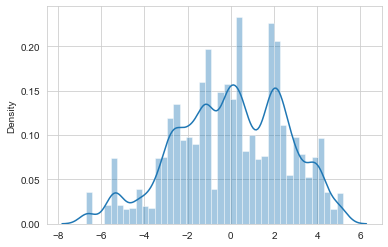

In [23]:
sns.distplot(predictions-y_test)

Baseline Models

First, I will run the three models with just the default parameters to get baseline scores.



Linear Regression


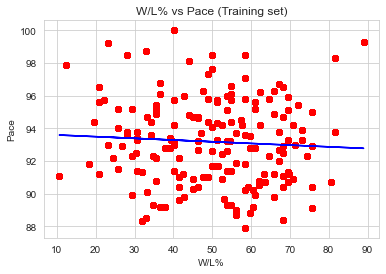

In [24]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('W/L% vs Pace (Training set)')
plt.xlabel('W/L%')
plt.ylabel('Pace')
plt.show()

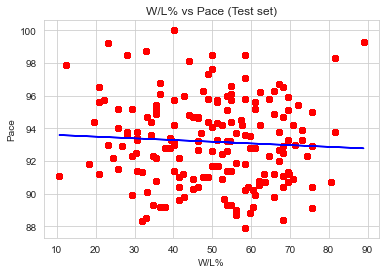

In [25]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, model.predict(X_test), color = 'blue')
plt.title('W/L% vs Pace (Test set)')
plt.xlabel('W/L%')
plt.ylabel('Pace')
plt.show()

Here we can see Pace vs W/L %. This model shows that there is actually a negative correlation between Pace and W/L%. Though it is only slight

C:\Users\ptlon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


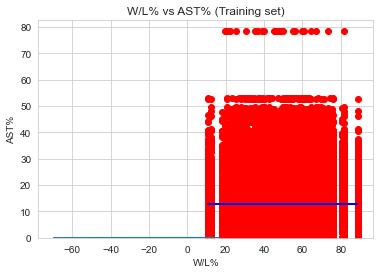

In [26]:
x = df4.iloc[:, 0:1].values
y = df4.iloc[:, -1].values

x = df4.iloc[:, 0:1].values
y = df4.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
predictions

sns.distplot(predictions-y_test)

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('W/L% vs AST% (Training set)')
plt.xlabel('W/L%')
plt.ylabel('AST%')

plt.show()



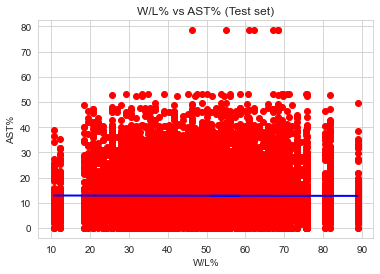

In [27]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, model.predict(X_test), color = 'blue')
plt.title('W/L% vs AST% (Test set)')
plt.xlabel('W/L%')
plt.ylabel('AST%')
plt.show()

Does Assits % have anything to do with winning? We can see its a flat regression. Meaning the regression line is flat when there is no ability to predict whatsoever. 

C:\Users\ptlon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


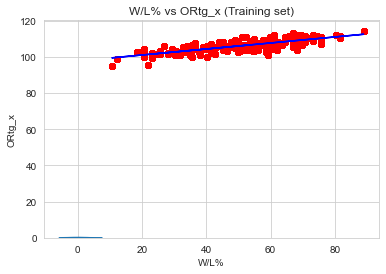

In [28]:
x = df3.iloc[:, 0:1].values
y = df3.iloc[:, -1].values

x = df3.iloc[:, 0:1].values
y = df3.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
predictions

sns.distplot(predictions-y_test)

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('W/L% vs ORtg_x (Training set)')
plt.xlabel('W/L%')
plt.ylabel('ORtg_x')

plt.show()

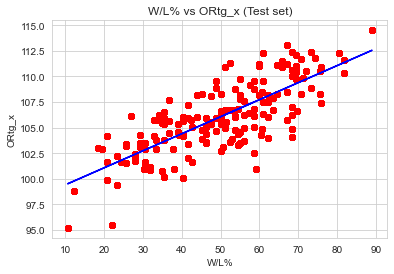

In [29]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, model.predict(X_test), color = 'blue')
plt.title('W/L% vs ORtg_x (Test set)')
plt.xlabel('W/L%')
plt.ylabel('ORtg_x')

plt.show()

Offense = wins! We can see there is a great positive regression which means the offensive ratings of a team is directly tied to wins

C:\Users\ptlon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


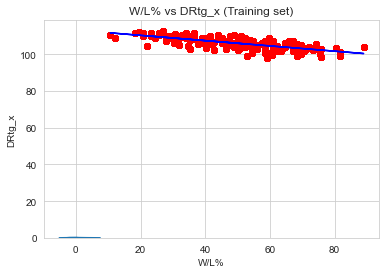

In [30]:
x = df2.iloc[:, 0:1].values
y = df2.iloc[:, -1].values

x = df2.iloc[:, 0:1].values
y = df2.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
predictions

sns.distplot(predictions-y_test)

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('W/L% vs DRtg_x (Training set)')
plt.xlabel('W/L%')
plt.ylabel('DRtg_x')

plt.show()

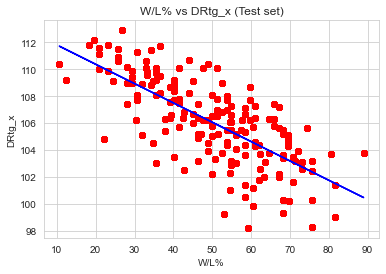

In [31]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, model.predict(X_test), color = 'blue')
plt.title('W/L% vs DRtg_x (Test set)')
plt.xlabel('W/L%')
plt.ylabel('DRtg_x')

plt.show()

Defense, it turns out, does not equal wins. In fact, we can see that the more defense a team players the less wins they will have.

C:\Users\ptlon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


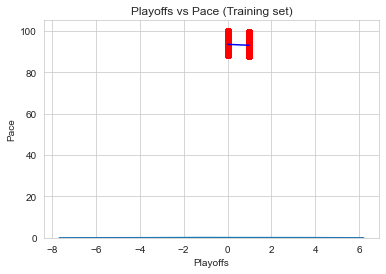

In [32]:
x = playoffs1.iloc[:, 0:1].values
y = playoffs1.iloc[:, -1].values

x = playoffs1.iloc[:, 0:1].values
y = playoffs1.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
predictions

sns.distplot(predictions-y_test)

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Playoffs vs Pace (Training set)')
plt.xlabel('Playoffs')
plt.ylabel('Pace')

plt.show()

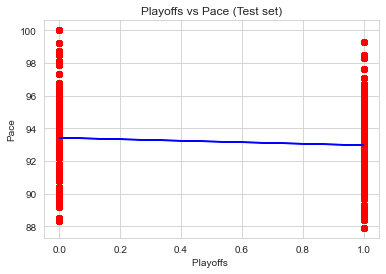

In [33]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, model.predict(X_test), color = 'blue')
plt.title('Playoffs vs Pace (Test set)')
plt.xlabel('Playoffs ')
plt.ylabel('Pace')

plt.show()

Do teams with 'Pace' make it to the playoffs? Though its just going to be a 0 or 1 (0 being no, 1 being making the playoffs). We can see that Pace does NOT mean more playoff appearances.

C:\Users\ptlon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


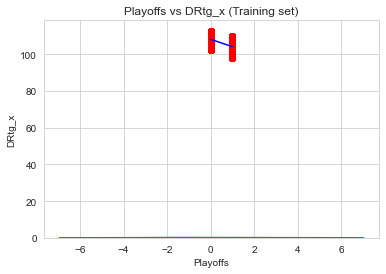

In [34]:
x = playoffs2.iloc[:, 0:1].values
y = playoffs2.iloc[:, -1].values

x = playoffs2.iloc[:, 0:1].values
y = playoffs2.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
predictions

sns.distplot(predictions-y_test)

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Playoffs vs DRtg_x (Training set)')
plt.xlabel('Playoffs')
plt.ylabel('DRtg_x')

plt.show()

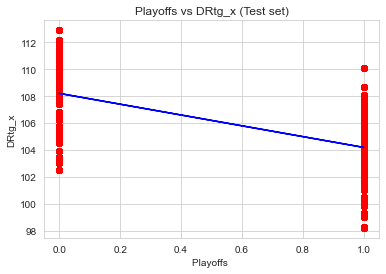

In [35]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, model.predict(X_test), color = 'blue')
plt.title('Playoffs vs DRtg_x (Test set)')
plt.xlabel('Playoffs ')
plt.ylabel('DRtg_x')

plt.show()

This is interesting, the higher a teams defensive rating, the lower their chances are at making the playoffs. Though, this does go with our Defense and win loss ratings.

C:\Users\ptlon\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


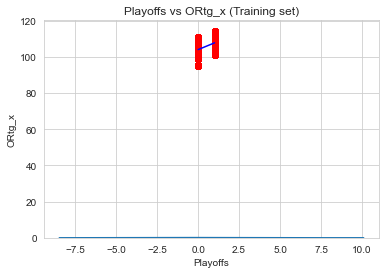

In [36]:
x = playoffs3.iloc[:, 0:1].values
y = playoffs3.iloc[:, -1].values

x = playoffs3.iloc[:, 0:1].values
y = playoffs3.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
predictions

sns.distplot(predictions-y_test)

plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Playoffs vs ORtg_x (Training set)')
plt.xlabel('Playoffs')
plt.ylabel('ORtg_x')

plt.show()

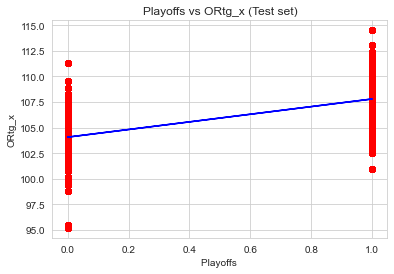

In [37]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, model.predict(X_test), color = 'blue')
plt.title('Playoffs vs ORtg_x (Test set)')
plt.xlabel('Playoffs ')
plt.ylabel('ORtg_x')

plt.show()

Exactly as we were all prediciting, the higher a teams offensive ratings, the better chance of going to the playoffs.

# Random Forest

In [38]:
x = nba.iloc[:, 0:1].values
y = nba.iloc[:, -1].values

x = nba.iloc[:, 0:1].values
y = nba.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [39]:
print('X_train Shape:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

X_train Shape: (63877, 1)
X_test: (21293, 1)
y_train: (63877,)
y_test: (21293,)


In [40]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

In [33]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'Playoffs')

Mean Absolute Error: 1.01 Playoffs


In [33]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Pace', round(accuracy, 2), '%.')

Pace -inf %.


C:\Users\ptlon\AppData\Local\Temp\ipykernel_12340\3186313948.py:2: RuntimeWarning: divide by zero encountered in true_divide
  mape = 100 * (errors / y_test)


In [34]:
nba_list = list(nba)

In [41]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names= None, max_depth=None, rounded = True)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')
from IPython.display import Image

KeyboardInterrupt: 

In [ ]:
Image('tree.png')

In [ ]:
# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = nba_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [ ]:
Image('small_tree.png')

In [ ]:
from treeinterpreter import treeinterpreter as ti
# fit a scikit-learn's regressor model
rf = RandomForestRegressor()
rf.fit(trainX, trainY)

prediction, bias, contributions = ti.predict(rf, testX)

In [ ]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(nba_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];



In [ ]:
nba.columns

In [43]:
nba.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 85170 entries, 0 to 85469
Data columns (total 46 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       85170 non-null  int64  
 1   Unnamed: 0  85170 non-null  int64  
 2   Season      85170 non-null  int64  
 3   Team        85170 non-null  object 
 4   W           85170 non-null  int64  
 5   L           85170 non-null  int64  
 6   W/L%        85170 non-null  float64
 7   Finish      85170 non-null  int64  
 8   SRS         85170 non-null  float64
 9   Pace        85170 non-null  float64
 10  Rel_Pace    85170 non-null  float64
 11  ORtg_x      85170 non-null  float64
 12  Rel_ORtg    85170 non-null  float64
 13  DRtg_x      85170 non-null  float64
 14  Rel_DRtg    85170 non-null  float64
 15  Playoffs    85170 non-null  int64  
 16  Coaches     85170 non-null  object 
 17  Top WS      85170 non-null  object 
 18  Player      85170 non-null  object 
 19  Age         85170 non-nul

# k-Nearest Neighbors

In [57]:
# k-nearest neighbors on the Iris Flowers Dataset
from random import seed
from random import randrange
from csv import reader
from math import sqrt
 
 
# Find the min and max values for each column
def dataset_minmax(playoffs1):
	minmax = list()
	for i in range(len(dataset[0])):
		col_values = [row[i] for row in dataset]
		value_min = min(col_values)
		value_max = max(col_values)
		minmax.append([value_min, value_max])
	return minmax
 
# Rescale dataset columns to the range 0-1
def normalize_dataset(playoffs1, minmax):
	for row in dataset:
		for i in range(len(row)):
			row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
 
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(playoffs1)
	fold_size = int(len(playoffs1) / n_folds)
	for _ in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split
 
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0
 
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(playoffs1, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores
 
# Calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)
 
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors
 
# Make a prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
	neighbors = get_neighbors(train, test_row, num_neighbors)
	output_values = [row[-1] for row in neighbors]
	prediction = max(set(output_values), key=output_values.count)
	return prediction
 
# kNN Algorithm
def k_nearest_neighbors(train, test, num_neighbors):
	predictions = list()
	for row in test:
		output = predict_classification(train, row, num_neighbors)
		predictions.append(output)
	return(predictions)
 
